# Análise de dados com Python

###  Análise e Limpeza de Dados de telecomunicações



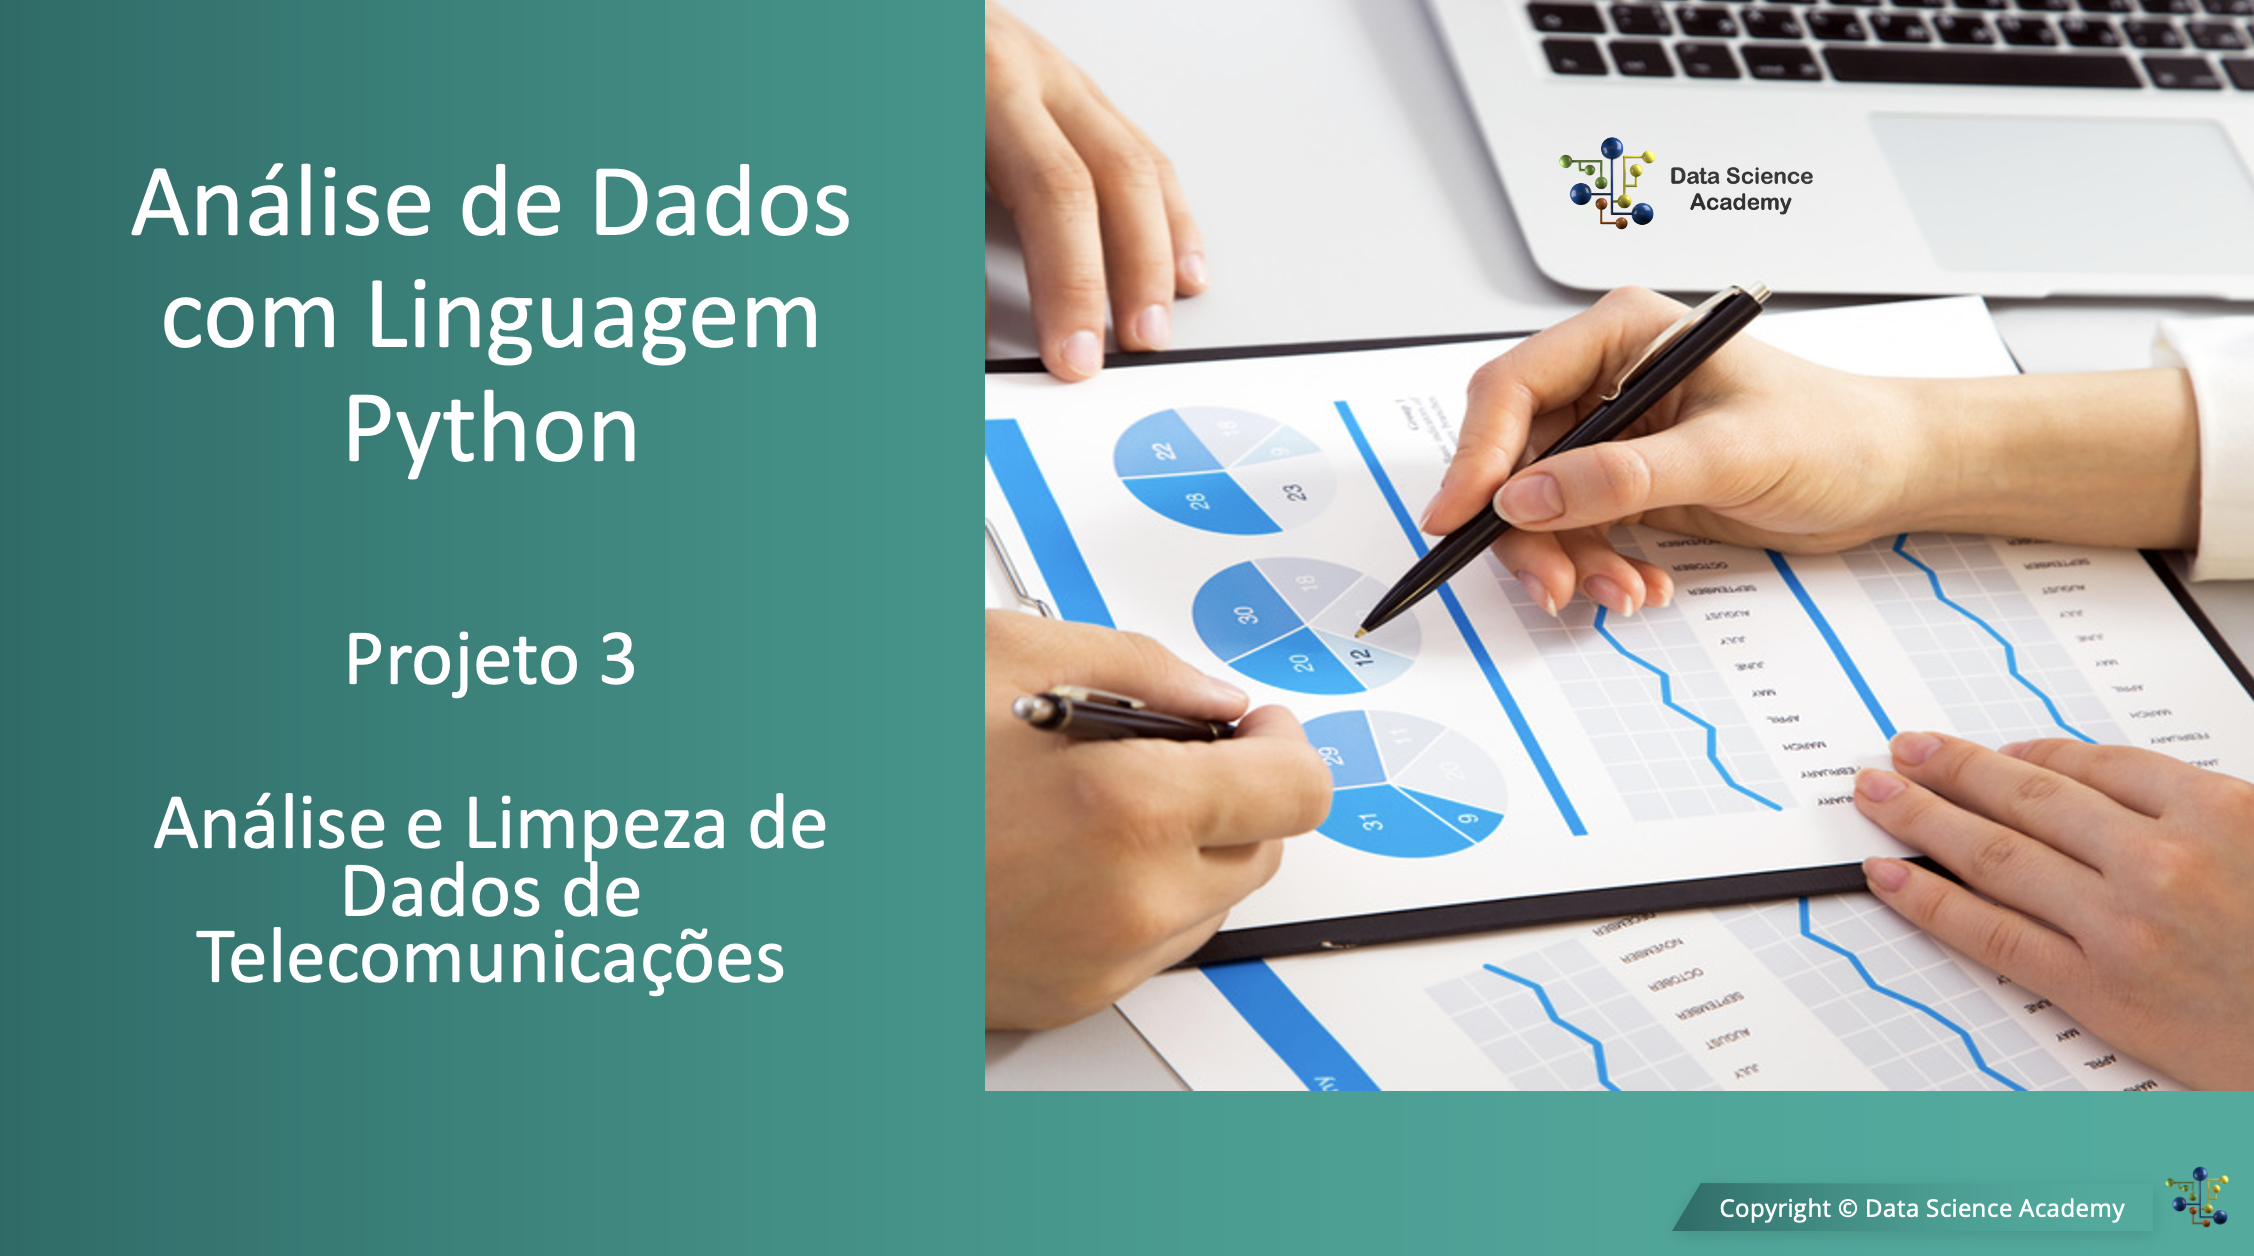

In [1]:
# imports

import math
import sys, os
import numpy as np
import pandas as pd

In [2]:
# Vamos adicionar caminho para os módulos Python

sys.path.append(os.path.abspath(os.path.join('C:/Users/ROBERTO/OneDrive/Documentos/Python_Modulos_Funções/modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
# criando uma lista para identificar valores ausentes
lista_labels_valores_ausentes = ["n/a", "na","undefined"]

In [5]:
# carregar o dataset
dataset = pd.read_csv("C:/Users/ROBERTO/OneDrive/Documentos/Python_Modulos_Funções/dados/dataset.csv",na_values=lista_labels_valores_ausentes )

In [6]:
# shape
dataset.shape

(150001, 55)

In [7]:
# Amostra de dados
dataset.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
# carregando dicionario
dicionario = pd.read_excel("C:/Users/ROBERTO/OneDrive/Documentos/Python_Modulos_Funções/dados/Dicionario.xlsx")

In [9]:
# shape
dicionario.shape

(56, 2)

In [10]:
# amostra dos dados
dicionario.head()

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)


# Análise Exploratória

In [11]:
# info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [12]:
# Estatístiscas Descritivas 
dataset.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156

In [13]:
# shape
dataset.shape

(150001, 55)

In [14]:
# shape
dicionario.shape

(56, 2)

In [15]:
# concatena os dataframes
df_compara_colunas = pd.concat([pd.Series(dataset.columns.tolist()),
                               dicionario['Fields']],
                              axis=1)

In [16]:
# Renomeia as colunas
df_compara_colunas.rename(columns ={0: 'Coluna no Dataset', 'Fields': 'Coluna no Dicionario'},
                         inplace = True)

In [17]:
# Visualizar
df_compara_colunas

,Coluna no Dataset,Coluna no Dicionario
0,Bearer Id,bearer id
1,Start,Dur. (ms)
2,Start ms,Start
3,End,Start ms
4,End ms,End
5,Dur. (ms),End ms
6,IMSI,Dur. (s)
7,MSISDN/Number,IMSI
8,IMEI,MSISDN/Number
9,Last Location Name,IMEI


In [18]:
dataset[['Dur. (ms)', 'Dur. (ms).1']]

,Dur. (ms),Dur. (ms).1
0,1823652.0,1.823653e+09
1,1365104.0,1.365104e+09
2,1361762.0,1.361763e+09
3,1321509.0,1.321510e+09
4,1089009.0,1.089009e+09
...,...,...
149996,81230.0,8.123076e+07
149997,97970.0,9.797070e+07
149998,98249.0,9.824953e+07
149999,97910.0,9.791063e+07


In [19]:
# Renomeia colunas

dataset.rename(columns={'Dur. (ms)' : 'Dur (s)',
                       'Dur. (ms).1' : 'Dur (ms)',
                       'Start ms' : 'Start Offset (ms)',
                       'End ms' : 'End Offset (ms)'},
                               inplace=True)

In [20]:
# Lista de colunas do dataset
dataset.columns.tolist()

['Bearer Id',
 'Start',
 'Start Offset (ms)',
 'End',
 'End Offset (ms)',
 'Dur (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 12

# Estratégia de limpeza 1 - Tratamento de Valores Ausentes

In [21]:
help(func_calc_percentual_valores_ausentes)

Help on function func_calc_percentual_valores_ausentes in module estrategia1:

func_calc_percentual_valores_ausentes(df)
    # Calcula o percentual de valores ausentes



In [22]:
# verifica o pecentual de valores ausentes
#Função do médulo Estratégia 1

func_calc_percentual_valores_ausentes(dataset)

O dataset tem 12.72 % de valores ausentes.


In [23]:
# cria tabela com valores ausentes
df_missing = func_calc_percentual_valores_ausentes_coluna(dataset)

O dataset tem 55 colunas.
Encontrado: 41 colunas que têm valores ausentes.


In [24]:
# Visualiza

df_missing

,Valores Ausentes,% de Valores Ausentes,Dtype
Nb of sec with 37500B < Vol UL,130254,86.84,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.56,float64
Nb of sec with 125000B < Vol DL,97538,65.02,float64
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.39,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.93,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.88,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
HTTP UL (Bytes),81810,54.54,float64
HTTP DL (Bytes),81474,54.32,float64


In [25]:
# Colunas que serão removidas
colunas_para_remover = df_missing[df_missing['% de Valores Ausentes']>=30.00].index.tolist()

In [26]:
# Colunas que serão removidas
colunas_para_remover

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [27]:
# colunas que serão removidas
colunas_para_remover =[col for col in colunas_para_remover if col not in ['TCP UL Retrans. Vol (Bytes)',
                                                                         'TCP DL Retrans. Vol (Bytes)']]

In [28]:
# colunas que serão removidas
colunas_para_remover

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [29]:
# drop das colunas e cria outro dataframe
dataset_clean = dataset.drop(colunas_para_remover, axis=1)

In [30]:
# shape
dataset_clean.shape

(150001, 47)

In [31]:
func_calc_percentual_valores_ausentes(dataset_clean)

O dataset tem 3.85 % de valores ausentes.


In [32]:
func_calc_percentual_valores_ausentes_coluna(dataset_clean)

O dataset tem 47 colunas.
Encontrado: 33 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
Avg RTT DL (ms),27829,18.55,float64
Avg RTT UL (ms),27812,18.54,float64
Handset Type,9559,6.37,object
Handset Manufacturer,9559,6.37,object
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64


In [33]:
# Imputação com Preenchimento Reverso
fix_missing_bfill(dataset_clean, 'TCP UL Retrans. Vol (Bytes)')

96649 valores ausentes na coluna TCP UL Retrans. Vol (Bytes) foram substituídos usando o método de preenchimento reverso.


0         7230.0
1         7230.0
2         7230.0
3         7230.0
4         7230.0
           ...  
149996       NaN
149997       NaN
149998       NaN
149999       NaN
150000       NaN
Name: TCP UL Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [34]:
# Imputação com Preenchimento Reverso
fix_missing_bfill(dataset_clean, 'TCP DL Retrans. Vol (Bytes)')

88146 valores ausentes na coluna TCP DL Retrans. Vol (Bytes) foram substituídos usando o método de preenchimento reverso.


0         19520.0
1         19520.0
2         19520.0
3         19520.0
4         19520.0
           ...   
149996        NaN
149997        NaN
149998        NaN
149999        NaN
150000        NaN
Name: TCP DL Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [35]:
dataset_clean['Avg RTT DL (ms)'].skew(skipna = True)

62.90782807995961

In [37]:
dataset_clean['Avg RTT UL (ms)'].skew(skipna = True)

28.45741458546382

In [38]:
# Imputação com Preenchimento Progressivo
fix_missing_ffill(dataset_clean,'Avg RTT DL (ms)')

27829 valores ausentes na coluna Avg RTT DL (ms) foram substituídos usando o método de preenchimento progressivo.


0         42.0
1         65.0
2         65.0
3         65.0
4         65.0
          ... 
149996    32.0
149997    27.0
149998    43.0
149999    37.0
150000    37.0
Name: Avg RTT DL (ms), Length: 150001, dtype: float64

In [39]:
# Imputação com Preenchimento Progressivo
fix_missing_ffill(dataset_clean,'Avg RTT UL (ms)')

27812 valores ausentes na coluna Avg RTT UL (ms) foram substituídos usando o método de preenchimento progressivo.


0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
149996    0.0
149997    2.0
149998    6.0
149999    5.0
150000    5.0
Name: Avg RTT UL (ms), Length: 150001, dtype: float64

#### Checamos novamente os valores ausentes.

In [40]:
func_calc_percentual_valores_ausentes(dataset_clean)

O dataset tem 0.44 % de valores ausentes.


In [43]:
func_calc_percentual_valores_ausentes_linha(dataset_clean)

7.96 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [44]:
func_calc_percentual_valores_ausentes_coluna(dataset_clean)

O dataset tem 47 colunas.
Encontrado: 31 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Handset Type,9559,6.37,object
Handset Manufacturer,9559,6.37,object
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64
UL TP > 300 Kbps (%),792,0.53,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.53,float64
10 Kbps < UL TP < 50 Kbps (%),792,0.53,float64
UL TP < 10 Kbps (%),792,0.53,float64


In [ ]:
# Imputação de variáveis categóricas 

In [45]:
fix_missing_value(dataset_clean, 'Handset Type', 'unknown')
fix_missing_value(dataset_clean, 'Handset Manufacturer', 'unknown')


9559 valores ausentes na coluna Handset Type foram substituídos por unknown.
9559 valores ausentes na coluna Handset Manufacturer foram substituídos por unknown.


0         Samsung
1         Samsung
2         Samsung
3         unknown
4         Samsung
           ...   
149996      Apple
149997      Apple
149998      Apple
149999     Huawei
150000    unknown
Name: Handset Manufacturer, Length: 150001, dtype: object

###### Checamos novamente os valores ausentes

In [46]:
func_calc_percentual_valores_ausentes(dataset_clean)

O dataset tem 0.17 % de valores ausentes.


In [47]:
func_calc_percentual_valores_ausentes_linha(dataset_clean)

2.08 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [48]:
# drop de linhas com valores ausentes
drop_rows_with_missing_values(dataset_clean)

3114 linhas contendo valores ausentes foram descartadas.


In [50]:
func_calc_percentual_valores_ausentes(dataset_clean)

O dataset tem 0.0 % de valores ausentes.


In [51]:
# shape
dataset_clean.shape

(146887, 47)

# Estratégia 2 - Conversão de Tipos de dados

In [52]:
dataset_clean.dtypes

Bearer Id                         float64
Start                              object
Start Offset (ms)                 float64
End                                object
End Offset (ms)                   float64
Dur (s)                           float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              

In [58]:
dataset_clean.head(10)

,Bearer Id,Start,Start Offset (ms),End,End Offset (ms),Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur (ms),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,unknown,unknown,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,65.0,5.0,70.0,54.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,22639.0,22700.0,1.074638e+09,unknown,unknown,112.0,118.0,3148833.0,51181.0,10351530.0,2582603.0,1980032.0,922378.0,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,102.0,5.0,22.0,38.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,9785.0,316210.0,1.035262e+09,Huawei,Huawei Mate 20 Lite,33.0,655.0,1623509.0,1482.0,1837897.0,3068975.0,1838947.0,252032.0,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,39.0,18.0,3698.0,416.0,19520.0,7230.0,99.0,

In [60]:
# Converte para Datetime
convert_to_datetime(dataset_clean,['Start','End'])

In [61]:
# Extrai as colunas do tipo object
string_columns= dataset_clean.select_dtypes(include='object').columns.tolist()

In [62]:
# Visualizar
string_columns

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [63]:
# Converte para string
convert_to_string(dataset_clean,string_columns)

In [64]:
# Lista de Colunas para conversão
int_cols = ['Bearer Id','IMSI','MSISDN/Number','IMEI']                     
 

In [66]:
# convert para int
convert_to_int(dataset_clean,int_cols)

In [67]:
dataset_clean.dtypes

Bearer Id                                  int64
Start                             datetime64[ns]
Start Offset (ms)                        float64
End                               datetime64[ns]
End Offset (ms)                          float64
Dur (s)                                  float64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                        string
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

In [68]:
# Vamos checar se há registros duplicados
drop_duplicates(dataset_clean)

Nenhuma linha duplicada foi encontrada.


In [69]:
# conversão e comparação
temp_df = dataset_clean[['Dur (s)','Dur (ms)']].copy()
multiply_by_factor(temp_df, ['Dur (ms)' ], 1/1000)
temp_df['comparison']=(temp_df['Dur (s)']== temp_df['Dur (ms)'].apply(math.floor))

In [70]:
temp_df

,Dur (s),Dur (ms),comparison
0,1823652.0,1823652.892,True
1,1365104.0,1365104.371,True
2,1361762.0,1361762.651,True
3,1321509.0,1321509.685,True
4,1089009.0,1089009.389,True
...,...,...,...
149991,61661.0,61661.729,True
149992,84940.0,84940.610,True
149993,125622.0,125622.433,True
149994,113545.0,113545.185,True


In [71]:
# As duas colunas são iguais?
print(all(temp_df['comparison']))

True


 Isso prova que, quando arrendodadas, essas duas colunas são iguais. Portanto, manteremos "Dur(ms)", pois é mais preciso, e removeremos a "Dur(s)"

In [72]:
# drop de coluna
drop_columns(dataset_clean,['Dur (s)'])

1 coluna foi descartada.


# Estratégia 3 - Tratamento de outliers

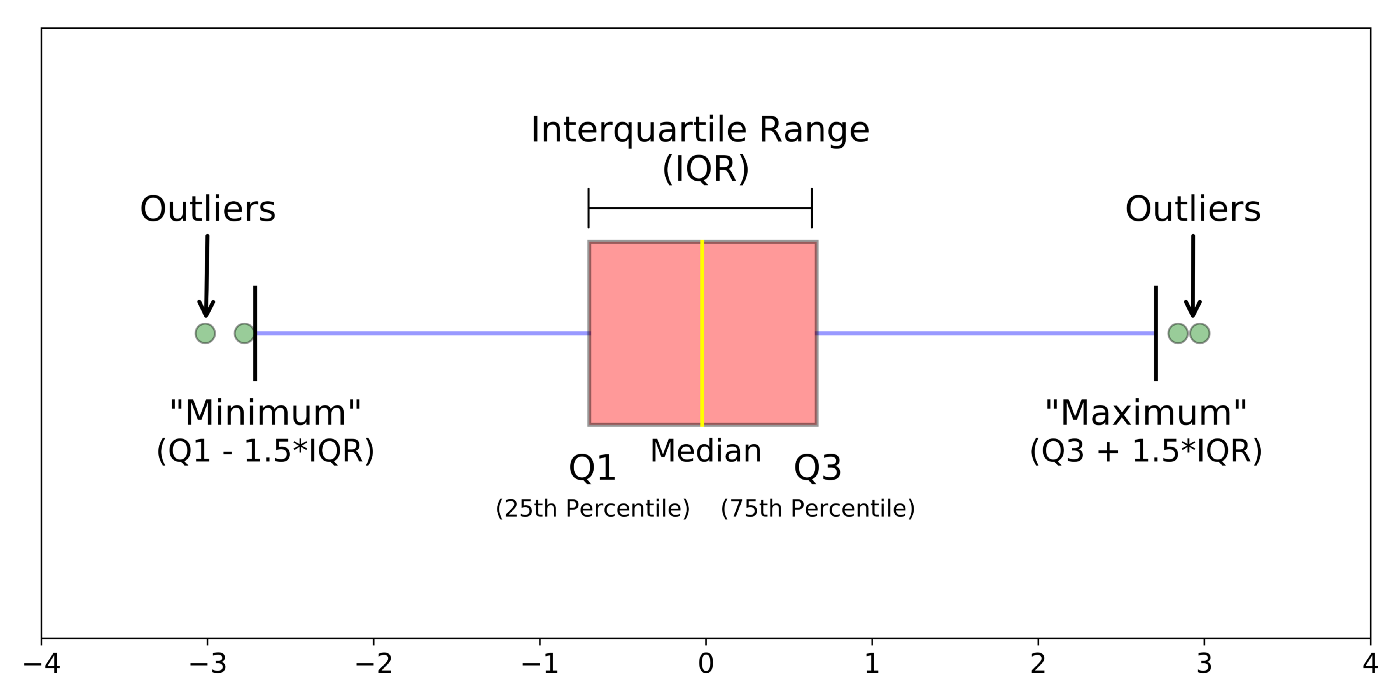

In [74]:
# cria o objeto trata outlier
trata_outlier = TrataOutlier(dataset_clean)

In [75]:
# lista de colunas Float64
lista_colunas = dataset_clean.select_dtypes('float64').columns.tolist()

In [76]:
lista_colunas

['Start Offset (ms)',
 'End Offset (ms)',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [77]:
# visão geral dos outliers
trata_outlier.getOverview(lista_colunas)

Nome de Coluna,DL TP > 1 Mbps (%),10 Kbps < UL TP < 50 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Nb of sec with Vol UL < 1250B,Nb of sec with Vol DL < 6250B,UL TP < 10 Kbps (%),TCP DL Retrans. Vol (Bytes),Avg Bearer TP UL (kbps),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),Avg RTT UL (ms),Avg RTT DL (ms),50 Kbps < DL TP < 250 Kbps (%),Avg Bearer TP DL (kbps),Dur (ms),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Total UL (Bytes),Youtube UL (Bytes),Other UL (Bytes),Other DL (Bytes),Gaming UL (Bytes),Gaming DL (Bytes),Netflix UL (Bytes),Netflix DL (Bytes),Start Offset (ms),Youtube DL (Bytes),Email UL (Bytes),Email DL (Bytes),Google UL (Bytes),Google DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),End Offset (ms),Total DL (Bytes)
Min,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7142988.0,0.0,0.0,2866892.0,105.0,148.0,3290.0,59.0,2516.0,35.0,42.0,0.0,53.0,2.0,14.0,3.0,207.0,0.0,12.0,0.0,7114041.0
Q1,0.0,0.0,0.0,15418.0,22073.0,107.0,87.0,99.0,24895.0,47.0,3299.5,91.0,2.0,31.0,0.0,43.0,58526863.0,0.0,0.0,33218346.0,5516549.0,4144551.0,210155459.0,4132622.0,210381659.0,5480202.0,5776625.5,250.0,5833462.0,233439.0,892573.0,1024371.5,2882586.5,16431.0,898089.0,251.0,243073402.5
Median,0.0,0.0,0.0,39726.0,47180.0,217.0,201.0,100.0,391635.0,63.0,16436.0,100.0,5.0,44.0,0.0,64.0,86399988.0,0.0,0.0,41143144.0,11013447.0,8265817.0,421633232.0,8294516.0,423492394.0,10999348.0,11642708.0,499.0,11616334.0,466357.0,1793613.0,2054793.0,5766724.0,32908.0,1793409.0,500.0,455963875.0
Q3,0.0,0.0,1.0,697298.5,611803.0,2466.5,2612.5,100.0,3078146.0,1136.0,68622.0,100.0,13.0,67.0,4.0,20024.0,133159382.0,0.0,0.0,49034880.0,16514278.0,12382039.5,631361047.5,12432390.5,633333998.5,16503222.5,17469653.0,749.0,17440635.5,700297.5,2689818.0,3088071.5,8625551.0,49326.5,2694640.0,750.0,665783068.0
Max,94.0,98.0,76.0,136536461.0,144911293.0,604122.0,604061.0,100.0,4294425570.0,58613.0,2908226006.0,100.0,7120.0,96923.0,93.0,378160.0,1859336442.0,85.0,96.0,78331311.0,22011962.0,16558816.0,843442489.0,16558794.0,843441889.0,22011955.0,23259189.0,999.0,23259098.0,936418.0,3586146.0,4121357.0,11462832.0,65870.0,3586064.0,999.0,902969616.0
IQR,0.0,0.0,1.0,681880.5,589730.0,2359.5,2525.5,1.0,3053251.0,1089.0,65322.5,9.0,11.0,36.0,4.0,19981.0,74632519.0,0.0,0.0,15816534.0,10997729.0,8237488.5,421205588.5,8299768.5,422952339.5,11023020.5,11693027.5,499.0,11607173.5,466858.5,1797245.0,2063700.0,5742964.5,32895.5,1796551.0,499.0,422709665.5
Lower fence,0.0,0.0,-1.5,-1007402.75,-862522.0,-3432.25,-3701.25,97.5,-4554981.5,-1586.5,-94684.25,77.5,-14.5,-23.0,-6.0,-29928.5,-53421915.5,0.0,0.0,9493545.0,-10980044.5,-8211681.75,-421652923.75,-8317030.75,-424046850.25,-11054328.75,-11762915.75,-498.5,-11577298.25,-466848.75,-1803294.5,-2071178.5,-5731860.25,-32912.25,-1796737.5,-497.5,-390991095.75
Upper fence,0.0,0.0,2.5,1720119.25,1496398.0,6005.75,6400.75,101.5,7658022.5,2769.5,166605.75,113.5,29.5,121.0,10.0,49995.5,245108160.5,0.0,0.0,72759681.0,33010871.5,24738272.25,1263169430.25,24882043.25,1267762507.75,33037753.25,35009194.25,1497.5,34851395.75,1400585.25,5385685.5,6183621.5,17239997.75,98669.75,5389466.5,1498.5,1299847566.25
Skew,5.345557,10.941071,4.503234,5.821286,7.321154,7.467915,9.009273,-8.958674,16.755094,4.473627,96.168844,-2.293488,26.544463,68.322057,3.273684,2.57405,3.946116,21.051707,35.993888,-0.001944,-0.001265,0.001481,0.001832,-0.002566,-0.003914,-0.000273,-0.002172,0.000823,0.000119,0.007312,-0.002659,0.002242,-0.008414,0.000258,-0.001633,-0.001251,-0.003579
Num_Outliers,36594,31509,29343,26126,25501,24870,24604,21811,21625,21104,20367,18114,16278,16181,14955,12678,7057,4476,2425,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
# replace dos outliers
trata_outlier.replace_outliers_with_fences(lista_colunas)

In [79]:
# Visão geral dos outliers
trata_outlier.getOverview(lista_colunas)

Nome de Coluna,Start Offset (ms),Nb of sec with Vol DL < 6250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Nb of sec with Vol UL < 1250B,Dur (ms),End Offset (ms),Activity Duration UL (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Total DL (Bytes)
Min,0.0,1.0,12.0,0.0,207.0,3.0,14.0,2.0,53.0,105.0,42.0,35.0,2516.0,59.0,3290.0,148.0,9493545.0,1.0,7142988.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,77.5,0.0,0.0,0.0,97.5,0.0,0.0,0.0,0.0,7114041.0
Q1,250.0,87.0,898089.0,16431.0,2882586.5,1024371.5,892573.0,233439.0,5833462.0,5516549.0,5776625.5,5480202.0,210381659.0,4132622.0,210155459.0,4144551.0,33218346.0,107.0,58526863.0,251.0,22073.0,31.0,2.0,43.0,47.0,24895.0,3299.5,91.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,15418.0,243073402.5
Median,499.0,201.0,1793409.0,32908.0,5766724.0,2054793.0,1793613.0,466357.0,11616334.0,11013447.0,11642708.0,10999348.0,423492394.0,8294516.0,421633232.0,8265817.0,41143144.0,217.0,86399988.0,500.0,47180.0,44.0,5.0,64.0,63.0,391635.0,16436.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,39726.0,455963875.0
Q3,749.0,2612.5,2694640.0,49326.5,8625551.0,3088071.5,2689818.0,700297.5,17440635.5,16514278.0,17469653.0,16503222.5,633333998.5,12432390.5,631361047.5,12382039.5,49034880.0,2466.5,133159382.0,750.0,611803.0,67.0,13.0,20024.0,1136.0,3078146.0,68622.0,100.0,4.0,1.0,0.0,100.0,0.0,0.0,0.0,697298.5,665783068.0
Max,999.0,6400.75,3586064.0,65870.0,11462832.0,4121357.0,3586146.0,936418.0,23259098.0,22011962.0,23259189.0,22011955.0,843441889.0,16558794.0,843442489.0,16558816.0,72759681.0,6005.75,245108160.5,999.0,1496398.0,121.0,29.5,49995.5,2769.5,7658022.5,166605.75,100.0,10.0,2.5,0.0,100.0,0.0,0.0,0.0,1720119.25,902969616.0
IQR,499.0,2525.5,1796551.0,32895.5,5742964.5,2063700.0,1797245.0,466858.5,11607173.5,10997729.0,11693027.5,11023020.5,422952339.5,8299768.5,421205588.5,8237488.5,15816534.0,2359.5,74632519.0,499.0,589730.0,36.0,11.0,19981.0,1089.0,3053251.0,65322.5,9.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,681880.5,422709665.5
Lower fence,-498.5,-3701.25,-1796737.5,-32912.25,-5731860.25,-2071178.5,-1803294.5,-466848.75,-11577298.25,-10980044.5,-11762915.75,-11054328.75,-424046850.25,-8317030.75,-421652923.75,-8211681.75,9493545.0,-3432.25,-53421915.5,-497.5,-862522.0,-23.0,-14.5,-29928.5,-1586.5,-4554981.5,-94684.25,77.5,-6.0,-1.5,0.0,97.5,0.0,0.0,0.0,-1007402.75,-390991095.75
Upper fence,1497.5,6400.75,5389466.5,98669.75,17239997.75,6183621.5,5385685.5,1400585.25,34851395.75,33010871.5,35009194.25,33037753.25,1267762507.75,24882043.25,1263169430.25,24738272.25,72759681.0,6005.75,245108160.5,1498.5,1496398.0,121.0,29.5,49995.5,2769.5,7658022.5,166605.75,113.5,10.0,2.5,0.0,101.5,0.0,0.0,0.0,1720119.25,1299847566.25
Skew,0.000823,1.205814,-0.001633,0.000258,-0.008414,0.002242,-0.002659,0.007312,0.000119,-0.001265,-0.002172,-0.000273,-0.003914,-0.002566,0.001832,0.001481,-0.001978,1.209533,0.810422,-0.001251,1.207483,1.069479,1.165443,1.280613,1.230407,1.216388,1.20234,-1.22817,1.315047,1.098748,0.0,-0.947267,0.0,0.0,0.0,1.205281,-0.003579
Num_Outliers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Salvando os Dados apos a limpeza

In [81]:
# salvando os dados
dataset_clean.to_csv('C:/Users/ROBERTO/OneDrive/Documentos/Python_Modulos_Funções/dataset_clean.csv')